In [29]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [30]:
# load data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')

In [31]:
df_train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [32]:
# help function


def basic_feature_extract(df):
    df_= df.copy()
    # pickup
    df_["pickup_date"] = pd.to_datetime(df_.pickup_datetime.apply(lambda x : x.split(" ")[0]))
    df_["pickup_hour"] = df_.pickup_datetime.apply(lambda x : x.split(" ")[1].split(":")[0])
    df_["pickup_year"] = df_.pickup_datetime.apply(lambda x : x.split(" ")[0].split("-")[0])
    df_["pickup_month"] = df_.pickup_datetime.apply(lambda x : x.split(" ")[0].split("-")[1])
    df_["pickup_weekday"] = df_.pickup_datetime.apply(lambda x :pd.to_datetime(x.split(" ")[0]).weekday())
    # dropoff
    # in case test data dont have dropoff_datetime feature
    try:
        df_["dropoff_date"] = pd.to_datetime(df_.dropoff_datetime.apply(lambda x : x.split(" ")[0]))
        df_["dropoff_hour"] = df_.dropoff_datetime.apply(lambda x : x.split(" ")[1].split(":")[0])
        df_["dropoff_year"] = df_.dropoff_datetime.apply(lambda x : x.split(" ")[0].split("-")[0])
        df_["dropoff_month"] = df_.dropoff_datetime.apply(lambda x : x.split(" ")[0].split("-")[1])
        df_["dropoff_weekday"] = df_.dropoff_datetime.apply(lambda x :pd.to_datetime(x.split(" ")[0]).weekday())
    except:
        pass 
    return df_

# get weekday
import calendar

def get_weekday(df):
    list(calendar.day_name)
    df_=df.copy()
    df_['pickup_week_'] = pd.to_datetime(df_.pickup_datetime).dt.weekday
    df_['pickup_weekday_'] = df_['pickup_week_'].apply(lambda x: calendar.day_name[x])
    return df_

# get trip duration 
def get_duration(df):
    df_= df.copy()
    df_['trip_duration_cal'] = pd.to_datetime(df_['dropoff_datetime']) - pd.to_datetime(df_['pickup_datetime'])
    return df_
    

In [33]:
df_train_ = basic_feature_extract(df_train)

In [34]:
df_train_ = get_duration(df_train_)
df_train_ = get_weekday(df_train_)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [36]:
df_train_.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_weekday,dropoff_date,dropoff_hour,dropoff_year,dropoff_month,dropoff_weekday,trip_duration_cal,pickup_week_,pickup_weekday_
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,03,0,2016-03-14,17,2016,03,0,0 days 00:07:35,0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,06,6,2016-06-12,00,2016,06,6,0 days 00:11:03,6,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,01,1,2016-01-19,12,2016,01,1,0 days 00:35:24,1,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,04,2,2016-04-06,19,2016,04,2,0 days 00:07:09,2,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,03,5,2016-03-26,13,2016,03,5,0 days 00:07:15,5,Saturday


In [37]:
df_train.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

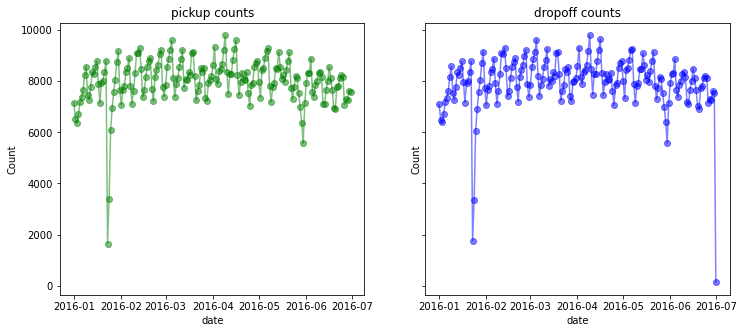

In [38]:
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

ax[0].plot(df_train_.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[1].plot(df_train_.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)

ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

<AxesSubplot:xlabel='dropoff_date'>

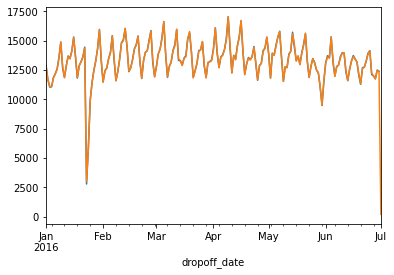

In [39]:
df_train_.groupby(['pickup_date']).sum()['passenger_count'].plot()
df_train_.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [40]:
df_train_.passenger_count.value_counts(sort=False)

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

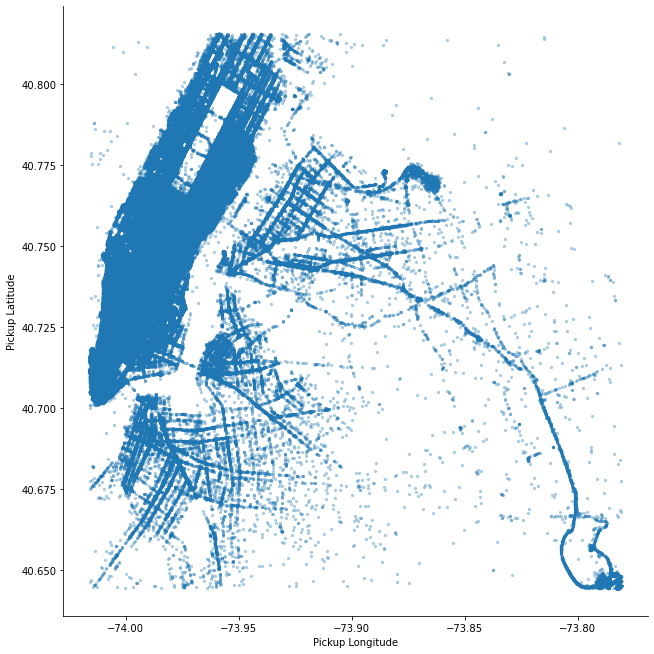

In [41]:
# pickup 
sns.lmplot(x="pickup_longitude", y="pickup_latitude", fit_reg=False, 
           size=9, scatter_kws={'alpha':0.3,'s':5}, data=df_train_[(
                 df_train_.pickup_longitude>df_train_.pickup_longitude.quantile(0.005))
               &(df_train_.pickup_longitude<df_train_.pickup_longitude.quantile(0.995))
               &(df_train_.pickup_latitude>df_train_.pickup_latitude.quantile(0.005))                           
               &(df_train_.pickup_latitude<df_train_.pickup_latitude.quantile(0.995))])

plt.xlabel('Pickup Longitude');
plt.ylabel('Pickup Latitude');
plt.show()

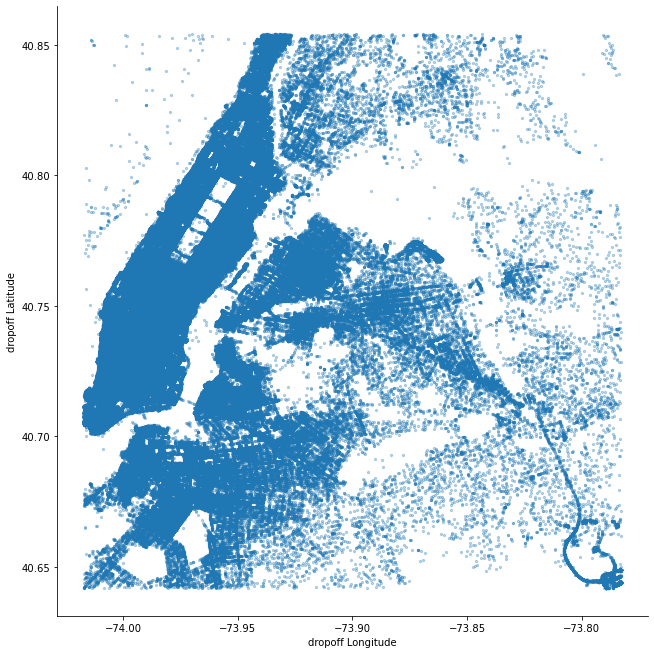

In [42]:
# dropoff 
sns.lmplot(x="dropoff_longitude", y="dropoff_latitude",fit_reg=False, 
           size=9, scatter_kws={'alpha':0.3,'s':5}, data=df_train_[(
                 df_train_.dropoff_longitude>df_train_.dropoff_longitude.quantile(0.005))
               &(df_train_.dropoff_longitude<df_train_.dropoff_longitude.quantile(0.995))
               &(df_train_.dropoff_latitude>df_train_.dropoff_latitude.quantile(0.005))                           
               &(df_train_.dropoff_latitude<df_train_.dropoff_latitude.quantile(0.995))])

plt.xlabel('dropoff Longitude');
plt.ylabel('dropoff Latitude');
plt.show()

Text(0.5, 1.0, 'Duration Distribution')

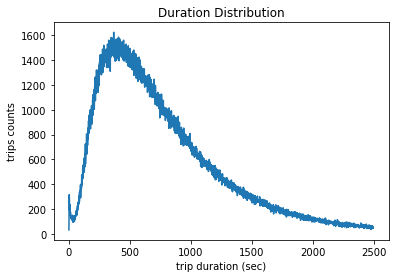

In [43]:
# trip duration overall distribution 
# remove outlier by only taking data under .97 quantile

tripduration = df_train_[df_train_.trip_duration < df_train_.trip_duration.quantile(.97)]
tripduration.groupby('trip_duration').count()['id'].plot()

plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

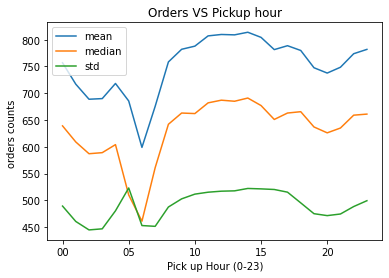

In [44]:
# pivot table

pd.pivot_table(tripduration, index='pickup_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('orders counts ')
plt.title('Orders VS Pickup hour')
plt.show()

Text(0, 0.5, 'mean(trip_duration)')

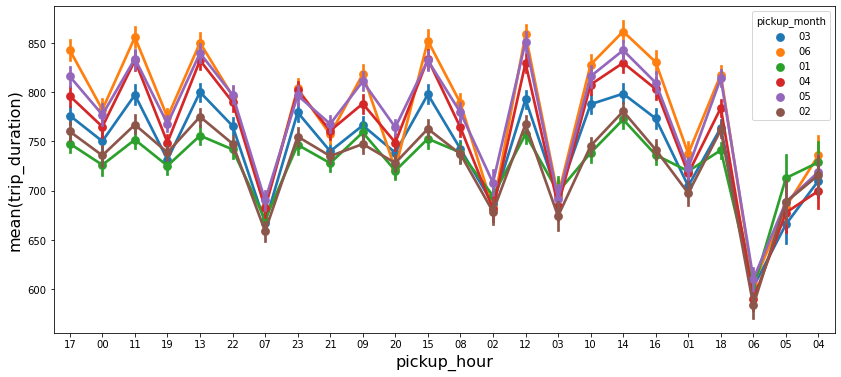

In [45]:
#  duration VS. pickup hour in given months 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

Text(0, 0.5, 'mean(trip_duration)')

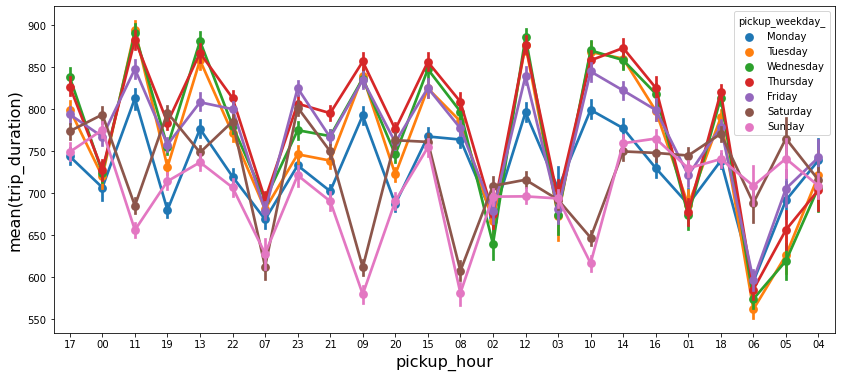

In [46]:
#  duration VS. pickup hour in weekdays 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=tripduration,hue='pickup_weekday_',hue_order=list(calendar.day_name))
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

In [48]:
# feature extract

###  distance 

# Haversine distance
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # km
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h 

# Manhattan distance
# Taxi cant fly ! have to move in blocks/roads
def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b


# get direction (arc tangent angle)
def get_direction(lat1, lng1, lat2, lng2):
    # theta
    AVG_EARTH_RADIUS = 6371  #  km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))



### ======================== ###

def get_features(df):
    # km 
    df_ = df.copy()
    ###  USING .loc making return array ordering 
    # distance
    df_.loc[:, 'distance_haversine'] = get_haversine_distance(
                      df_['pickup_latitude'].values,
                      df_['pickup_longitude'].values,
                      df_['dropoff_latitude'].values,
                      df_['dropoff_longitude'].values)
    df_.loc[:, 'distance_manhattan'] = get_manhattan_distance(
                      df_['pickup_latitude'].values,
                      df_['pickup_longitude'].values,
                      df_['dropoff_latitude'].values,
                      df_['dropoff_longitude'].values)
    # direction 
    df_.loc[:, 'direction'] = get_direction(df_['pickup_latitude'].values,
                                          df_['pickup_longitude'].values, 
                                          df_['dropoff_latitude'].values, 
                                          df_['dropoff_longitude'].values)
    # Get Average driving speed 
    # km/hr
    # (km/sec = 3600 * (km/hr))
    df_.loc[:, 'avg_speed_h'] = 3600 * df_['distance_haversine'] / df_['trip_duration']
    df_.loc[:, 'avg_speed_m'] = 3600 * df_['distance_manhattan'] / df_['trip_duration']
    
    return df_
    
# get speed (taxi velocity)
#df_train_.loc[:, 'avg_speed_h'] = 1000 * df_train_['distance_haversine'] / df_train_['trip_duration']
#df_train_.loc[:, 'avg_speed_m'] = 1000 * df_train_['distance_manhattan'] / df_train_['trip_duration']

df_train_ = get_features(df_train_)

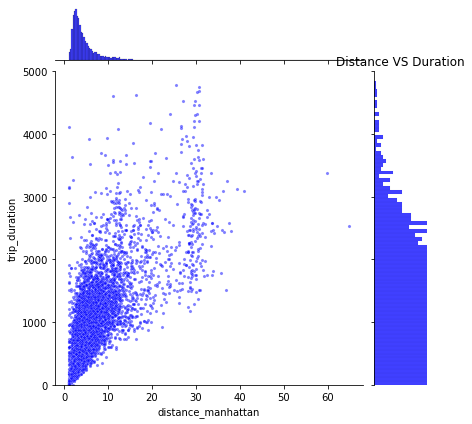

In [49]:
# distance VS duration 
sns.jointplot((df_train_["distance_manhattan"][:10000]+1),(df_train_["trip_duration"][:10000]+1),s=10,alpha=0.5,color='blue')
plt.xlabel('mile')
plt.ylabel('trip_duration')
plt.xlim(0,30)
plt.ylim(0,5000)
plt.title('Distance VS Duration')
plt.show()

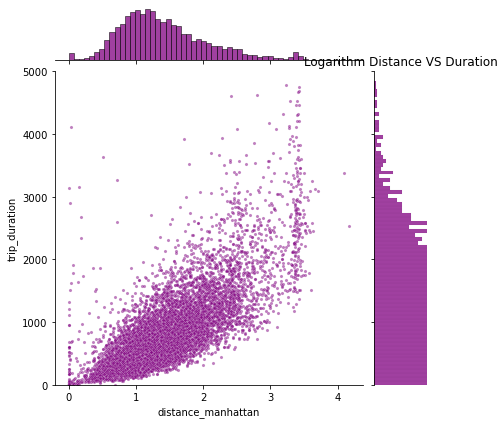

In [50]:
# log distance VS duration 
sns.jointplot(np.log(df_train_["distance_manhattan"][:10000]+1),(df_train_["trip_duration"][:10000]+1),s=10,alpha=0.5,color='purple')
plt.xlim(0,30)
plt.ylim(0,5000)
plt.title('Logarithm Distance VS Duration')
plt.xlabel('log(distance_manhattan)')
plt.ylabel('trip_duration')
plt.show()

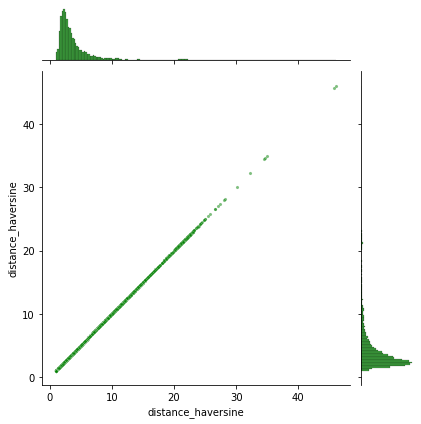

In [51]:
# haversine distance VS duration 
# or u can plot all data points, still a linear relation 
#sns.jointplot(np.log10(df_train_["distance_haversine"][:10000]+1),np.log10(df_train_["distance_haversine"][:10000]+1),s=10,alpha=0.5,color='green')
sns.jointplot((df_train_["distance_haversine"][:10000]+1),(df_train_["distance_haversine"][:10000]+1),s=10,alpha=0.5,color='green')
plt.xlabel('log (mile)')
plt.ylabel('log (trip_duration)')
plt.show()

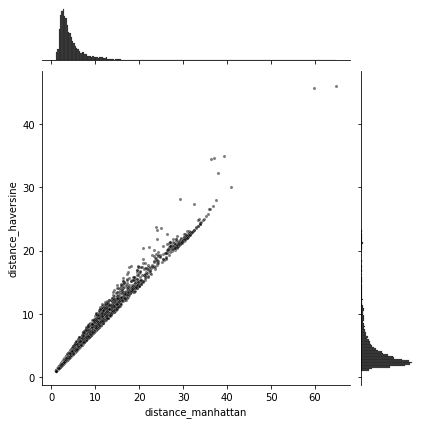

In [52]:
# manhattan distance VS duration 
# or u can plot all data points, still a linear relation
sns.jointplot((df_train_["distance_manhattan"][:10000]+1),(df_train_["distance_haversine"][:10000]+1),s=10,alpha=0.5,color='black')
plt.xlabel('log (mile)')
plt.ylabel('log (trip_duration)')
plt.show()

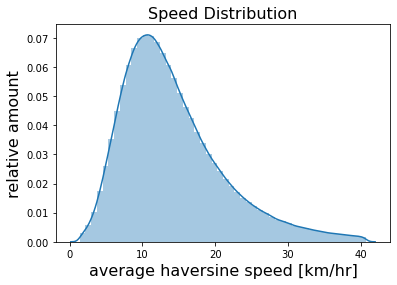

In [53]:
# remove potential outliers for better visualization
df_avg_speed = df_train_[(df_train_['avg_speed_h'] < df_train_['avg_speed_h'].quantile(0.99))&
         (df_train_['avg_speed_h'] > df_train_['avg_speed_h'].quantile(0.01))]

sns.distplot(df_avg_speed.avg_speed_h)
plt.xlabel('average haversine speed [km/hr]',fontsize=16)
plt.ylabel('relative amount',fontsize=16)
plt.title('Speed Distribution',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Driving Speed VS. Pickup Hour VS. Pickup Weekday')

<Figure size 1440x864 with 0 Axes>

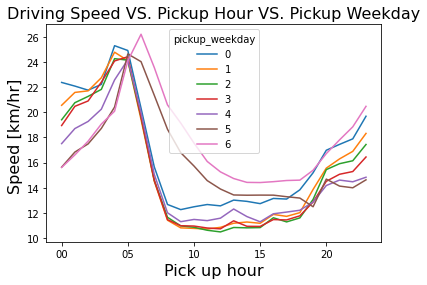

In [54]:
# Speed in different situations 
plt.figure(figsize=(20,12))
pd.pivot_table(df_train_, index='pickup_hour',columns='pickup_weekday' ,aggfunc=np.mean)['avg_speed_h'].plot()
plt.xlabel('Pick up hour',fontsize=16)
plt.ylabel('Speed [km/hr] ',fontsize=16)
plt.title('Driving Speed VS. Pickup Hour VS. Pickup Weekday',fontsize=16)

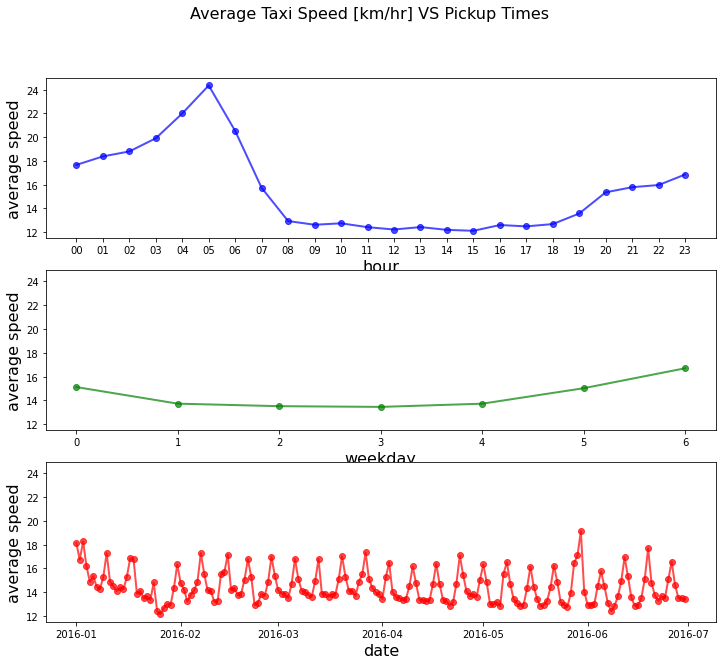

In [56]:
# haversine speed visualization 

fig, ax = plt.subplots(nrows=3, sharey=True)
fig.set_size_inches(12, 10)
ax[0].plot(df_train_.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(df_train_.groupby('pickup_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(df_train_.groupby('pickup_date').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour',fontsize=16)
ax[1].set_xlabel('weekday',fontsize=16)
ax[2].set_xlabel('date',fontsize=16)
ax[0].set_ylabel('average speed',fontsize=16)
ax[1].set_ylabel('average speed',fontsize=16)
ax[2].set_ylabel('average speed',fontsize=16)
fig.suptitle('Average Taxi Speed [km/hr] VS Pickup Times',fontsize=16)
plt.show()